In [12]:
import pandas as pd
import numpy as np  
import torch 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from xgboost import XGBClassifier
import json
import matplotlib.pyplot as plt 


In [5]:
df = pd.read_csv("combined_league_matches.csv")
champion_ids = [col for col in df.columns if 'champion' in col]
all_games = pd.concat([df[col] for col in champion_ids]) 
games_per_champ = all_games.value_counts() #maybe useful, find total number of games per champ id


encoder = LabelEncoder()

for col in ['red_champion_0', 'red_champion_1', 'red_champion_2', 'red_champion_3', 'red_champion_4',
            'blue_champion_0', 'blue_champion_1', 'blue_champion_2', 'blue_champion_3', 'blue_champion_4']:
    df[col] = encoder.fit_transform(df[col])

df['target'] = df['winner'].apply(lambda x: 1 if x == 'blue' else 0) #blueside win if 1
df = df.drop(columns=['match_id', 'winner'])

#if we want to test without mastery just uncomment below
#df = df.drop(columns=['red_mastery_0', 'red_mastery_1', 'red_mastery_2', 'red_mastery_3', 'red_mastery_4',
#            'blue_mastery_0', 'blue_mastery_1', 'blue_mastery_2', 'blue_mastery_3', 'blue_mastery_4'])

#scale all mastery values
mastery_columns = [
    'red_mastery_0', 'red_mastery_1', 'red_mastery_2', 'red_mastery_3', 'red_mastery_4',
    'blue_mastery_0', 'blue_mastery_1', 'blue_mastery_2', 'blue_mastery_3', 'blue_mastery_4'
]

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier(
    n_estimators=600,     # Number of trees
    learning_rate=0.05,    # Step size shrinkage
    max_depth=10,          # Maximum depth of trees
    subsample=0.8,        # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing trees
    n_jobs = 1,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  

fpr0, tpr0, thresholds0 = roc_curve(y_test, y_prob)
roc_auc0 = roc_auc_score(y_test, y_prob)

0.5461921445694266
              precision    recall  f1-score   support

           0       0.52      0.48      0.50      2563
           1       0.56      0.61      0.59      2860

    accuracy                           0.55      5423
   macro avg       0.54      0.54      0.54      5423
weighted avg       0.54      0.55      0.54      5423



In [6]:
df = pd.read_csv("combined_league_matches.csv")
champion_ids = [col for col in df.columns if 'champion' in col]
all_games = pd.concat([df[col] for col in champion_ids]) 
games_per_champ = all_games.value_counts() #maybe useful, find total number of games per champ id


encoder = LabelEncoder()

for col in ['red_champion_0', 'red_champion_1', 'red_champion_2', 'red_champion_3', 'red_champion_4',
            'blue_champion_0', 'blue_champion_1', 'blue_champion_2', 'blue_champion_3', 'blue_champion_4']:
    df[col] = encoder.fit_transform(df[col])

df['target'] = df['winner'].apply(lambda x: 1 if x == 'blue' else 0) #blueside win if 1
df = df.drop(columns=['match_id', 'winner'])

#if we want to test without mastery just uncomment below
#df = df.drop(columns=['red_mastery_0', 'red_mastery_1', 'red_mastery_2', 'red_mastery_3', 'red_mastery_4',
#            'blue_mastery_0', 'blue_mastery_1', 'blue_mastery_2', 'blue_mastery_3', 'blue_mastery_4'])

#scale all mastery values
mastery_columns = [
    'red_mastery_0', 'red_mastery_1', 'red_mastery_2', 'red_mastery_3', 'red_mastery_4',
    'blue_mastery_0', 'blue_mastery_1', 'blue_mastery_2', 'blue_mastery_3', 'blue_mastery_4'
]

scaler = StandardScaler() #can also try minmaxscaler and keep within certain range

df[mastery_columns] = scaler.fit_transform(df[mastery_columns])

In [7]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model = XGBClassifier(
    n_estimators=600,     # Number of trees
    learning_rate=0.05,    # Step size shrinkage
    max_depth=10,          # Maximum depth of trees
    subsample=0.8,        # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing trees
    n_jobs = 1,
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=1,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_prob)
roc_auc1 = roc_auc_score(y_test, y_prob)

0.5537525354969574
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      2563
           1       0.57      0.61      0.59      2860

    accuracy                           0.55      5423
   macro avg       0.55      0.55      0.55      5423
weighted avg       0.55      0.55      0.55      5423



In [10]:
df = pd.read_csv("combined_league_matches.csv")
champion_ids = [col for col in df.columns if 'champion' in col]
all_games = pd.concat([df[col] for col in champion_ids]) 
games_per_champ = all_games.value_counts() #maybe useful, find total number of games per champ id

with open("champion_max_winrates.json", "r") as file:
    win_rate_data = json.load(file)
win_rates = {int(k): float(v) for k, v in win_rate_data.items()}

for col in df.columns:
    if "champion" in col:
        df[col] = df[col].map(win_rates)

df['target'] = df['winner'].apply(lambda x: 1 if x == 'blue' else 0) #blueside win if 1
df = df.drop(columns=['match_id', 'winner'])

#mastery_columns = [
#    'red_mastery_0', 'red_mastery_1', 'red_mastery_2', 'red_mastery_3', 'red_mastery_4',
#    'blue_mastery_0', 'blue_mastery_1', 'blue_mastery_2', 'blue_mastery_3', 'blue_mastery_4'
#]

#scaler = StandardScaler() #can also try minmaxscaler and keep within certain range

#df[mastery_columns] = scaler.fit_transform(df[mastery_columns])

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = XGBClassifier(
    n_estimators=600,     # Number of trees
    learning_rate=0.05,    # Step size shrinkage
    max_depth=10,          # Maximum depth of trees
    subsample=0.8,        # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing trees
    n_jobs = 1,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_prob)
roc_auc2 = roc_auc_score(y_test, y_prob)

0.5685840707964602
              precision    recall  f1-score   support

           0       0.58      0.49      0.53      1344
           1       0.56      0.64      0.60      1368

    accuracy                           0.57      2712
   macro avg       0.57      0.57      0.57      2712
weighted avg       0.57      0.57      0.57      2712



In [17]:
df = pd.read_csv("combined_league_matches.csv")
champion_ids = [col for col in df.columns if 'champion' in col]
all_games = pd.concat([df[col] for col in champion_ids]) 
games_per_champ = all_games.value_counts() #maybe useful, find total number of games per champ id

with open("champions_with_mean_winrate.json", "r") as file:
    win_rate_data = json.load(file)
win_rates = {int(k): float(v.strip('%')) for k, v in win_rate_data.items()}

for col in df.columns:
    if "champion" in col:
        df[col] = df[col].map(win_rates)

df['target'] = df['winner'].apply(lambda x: 1 if x == 'blue' else 0) #blueside win if 1
df = df.drop(columns=['match_id', 'winner'])

#mastery_columns = [
#    'red_mastery_0', 'red_mastery_1', 'red_mastery_2', 'red_mastery_3', 'red_mastery_4',
#    'blue_mastery_0', 'blue_mastery_1', 'blue_mastery_2', 'blue_mastery_3', 'blue_mastery_4'
#]

#scaler = StandardScaler() #can also try minmaxscaler and keep within certain range

#df[mastery_columns] = scaler.fit_transform(df[mastery_columns])

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = XGBClassifier(
    n_estimators=600,     # Number of trees
    learning_rate=0.05,    # Step size shrinkage
    max_depth=10,          # Maximum depth of trees
    subsample=0.8,        # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing trees
    n_jobs = 1,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_prob)
roc_auc3 = roc_auc_score(y_test, y_prob)

0.5483038348082596
              precision    recall  f1-score   support

           0       0.54      0.47      0.50      1309
           1       0.56      0.62      0.59      1403

    accuracy                           0.55      2712
   macro avg       0.55      0.55      0.54      2712
weighted avg       0.55      0.55      0.55      2712



0.532448377581121
              precision    recall  f1-score   support

           0       0.53      0.46      0.49      1343
           1       0.53      0.61      0.57      1369

    accuracy                           0.53      2712
   macro avg       0.53      0.53      0.53      2712
weighted avg       0.53      0.53      0.53      2712



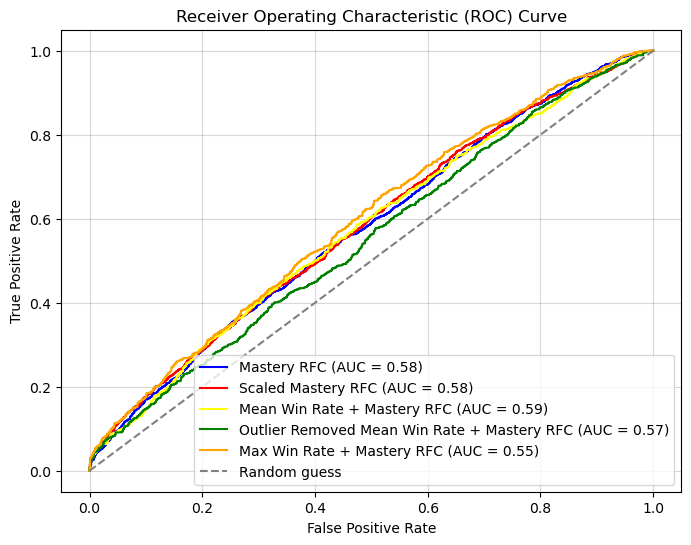

In [16]:
df = pd.read_csv("combined_league_matches.csv")
champion_ids = [col for col in df.columns if 'champion' in col]
all_games = pd.concat([df[col] for col in champion_ids]) 
games_per_champ = all_games.value_counts() #maybe useful, find total number of games per champ id

with open("outlier_removed_champion_winrates.json", "r") as file:
    win_rate_data = json.load(file)
win_rates = {int(k): float(v) for k, v in win_rate_data.items()}

for col in df.columns:
    if "champion" in col:
        df[col] = df[col].map(win_rates)

df['target'] = df['winner'].apply(lambda x: 1 if x == 'blue' else 0) #blueside win if 1
df = df.drop(columns=['match_id', 'winner'])

#mastery_columns = [
#    'red_mastery_0', 'red_mastery_1', 'red_mastery_2', 'red_mastery_3', 'red_mastery_4',
#    'blue_mastery_0', 'blue_mastery_1', 'blue_mastery_2', 'blue_mastery_3', 'blue_mastery_4'
#]

#scaler = StandardScaler() #can also try minmaxscaler and keep within certain range

#df[mastery_columns] = scaler.fit_transform(df[mastery_columns])

X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = XGBClassifier(
    n_estimators=600,     # Number of trees
    learning_rate=0.05,    # Step size shrinkage
    max_depth=10,          # Maximum depth of trees
    subsample=0.8,        # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing trees
    n_jobs = 1,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]  

fpr4, tpr4, thresholds4 = roc_curve(y_test, y_prob)
roc_auc4 = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr0, tpr0, color='blue', label=f'Mastery RFC (AUC = {roc_auc0:.2f})')
plt.plot(fpr1, tpr1, color='red', label=f'Scaled Mastery RFC (AUC = {roc_auc1:.2f})')
plt.plot(fpr3, tpr3, color='yellow', label=f'Mean Win Rate + Mastery RFC (AUC = {roc_auc2:.2f})')
plt.plot(fpr4, tpr4, color='green', label=f'Outlier Removed Mean Win Rate + Mastery RFC (AUC = {roc_auc3:.2f})')
plt.plot(fpr2, tpr2, color='orange', label=f'Max Win Rate + Mastery RFC (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.5)
plt.show()